### Load the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import datetime as dt
import nltk

In [2]:
tweet1 = pd.read_csv("china_082019_1_tweets_csv_hashed.csv")
user1 = pd.read_csv("china_082019_1_users_csv_hashed.csv")

C:\Users\k011957\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (15,19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tweet2 = pd.read_csv("china_082019_2_tweets_csv_hashed.csv")
user2 = pd.read_csv("china_082019_2_users_csv_hashed.csv")

#### Users

In [4]:
user = pd.concat([user1, user2])

In [173]:
user1.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,NaN,NaN,NaN,1,52,2017-08-30,zh-cn
1,919755217121316864,ailaiyi5,wuming11xia,NaN,NaN,NaN,0,0,2017-10-16,zh-cn
2,747292706536226816,牛小牛,gurevadona88,NaN,NaN,NaN,23949,52,2016-06-27,zh-cn
3,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,NaN,NaN,NaN,17,34,2016-08-08,es
4,907348345563303940,lishuishi,lishuishi,NaN,NaN,NaN,0,0,2017-09-11,zh-tw


In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 195
Data columns (total 10 columns):
userid                      940 non-null object
user_display_name           940 non-null object
user_screen_name            940 non-null object
user_reported_location      297 non-null object
user_profile_description    329 non-null object
user_profile_url            59 non-null object
follower_count              940 non-null int64
following_count             940 non-null int64
account_creation_date       940 non-null object
account_language            940 non-null object
dtypes: int64(2), object(8)
memory usage: 80.8+ KB


In [145]:
user1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 10 columns):
userid                      744 non-null object
user_display_name           744 non-null object
user_screen_name            744 non-null object
user_reported_location      182 non-null object
user_profile_description    189 non-null object
user_profile_url            14 non-null object
follower_count              744 non-null int64
following_count             744 non-null int64
account_creation_date       744 non-null object
account_language            744 non-null object
dtypes: int64(2), object(8)
memory usage: 58.2+ KB


In [150]:
user2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
userid                      196 non-null object
user_display_name           196 non-null object
user_screen_name            196 non-null object
user_reported_location      115 non-null object
user_profile_description    140 non-null object
user_profile_url            45 non-null object
follower_count              196 non-null int64
following_count             196 non-null int64
account_creation_date       196 non-null object
account_language            196 non-null object
dtypes: int64(2), object(8)
memory usage: 15.4+ KB


In [146]:
user1['account_creation_date'].nunique()
#user['create_m'] = pd.to_datetime(user['account_creation_date']).dt.month

289

In [148]:
user2['account_creation_date'].nunique()

175

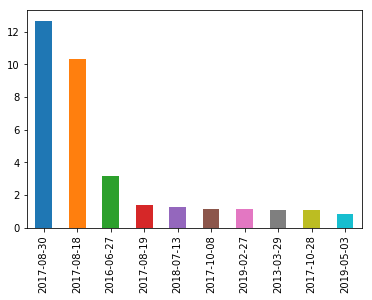

In [7]:
fig = plt.figure()
((pd.value_counts(user['account_creation_date'])[:10])/940*100).plot.bar()

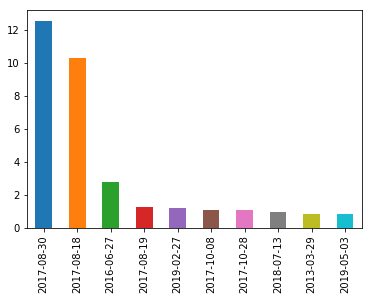

In [8]:
no_location = user[user['user_reported_location'].isnull()].copy()
fig = plt.figure()
((pd.value_counts(no_location['account_creation_date'])[:10])/940*100).plot.bar()

In [9]:
user['account_language'].value_counts()

zh-cn    612
en       231
ru        36
es        18
zh-CN     15
zh-tw     11
ja         8
en-gb      5
fr         4
Name: account_language, dtype: int64

In [10]:
user[(user['following_count'] >= 2001) & (user['follower_count'] <2000)]

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language


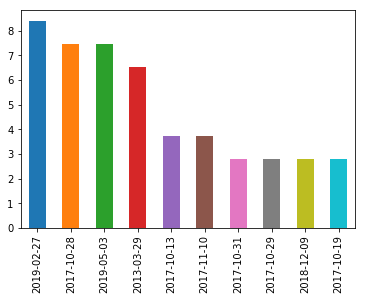

In [93]:
no_follow = user[(user['following_count'] == 0) & (user['follower_count'] == 0)].copy()
fig = plt.figure()
((pd.value_counts(no_follow['account_creation_date'])[:10])/107*100).plot.bar()

In [11]:
user['userid'].nunique()

940

### Summary of user part:

1. There are 744 unique users in the set1.
2. 592 (79.6%) use zh-CN. ( a simplified chinese from China)
3. There is no fake account from only following count and follwer count perspectives. Twitter has its limitiion on how many accounts you can follow, and the number is 2000. Robot-like accounts should look like following more than 2000 acounts but have very few followers. However, i don't find it here.
4. Almost 31% accounts are created on 2017/8/18 and 2017/8/30. Should follow what happen during 2017 summer.
5. For those who have no follower and not following any, 7/10 of the top 10 account create date are in 2017 winter.

#### Tweets~

In [139]:
tweet

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid',
       'in_reply_to_tweetid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [140]:
tweet.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,436306424587890688,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,1.0,0.0,NaN,NaN,[443196382],NaN
1,582682975969624064,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,52.0,[],['http://goo.gl/32K38q'],[],NaN
2,582997936541278208,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,[],[],[116351908],NaN
3,580404049901670400,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,[],['http://goo.gl/iC1GM9'],[],NaN
4,199007241142149121,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,NaN,['http://migre.me/8Ycqm'],NaN,NaN


In [141]:
tweet.describe()

,tweetid,follower_count,following_count,in_reply_to_tweetid,quoted_tweet_tweetid,retweet_tweetid,quote_count,reply_count,like_count,retweet_count
count,1.906831e+06,1.906831e+06,1.906831e+06,1.785020e+05,9.513300e+04,3.579360e+05,1.888906e+06,1.888906e+06,1.888906e+06,1.888906e+06
mean,7.206899e+17,2.444543e+04,1.350040e+04,5.869991e+17,8.621642e+17,6.013256e+17,7.288346e-03,8.859573e-02,4.557506e-02,1.496379e-01
std,2.729179e+17,2.948863e+04,9.531729e+03,3.471806e+17,8.568681e+16,2.745685e+17,4.159671e-01,9.644296e-01,1.644062e+00,3.454932e+00
min,8.126727e+08,0.000000e+00,0.000000e+00,8.237374e+08,1.847925e+15,1.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.789587e+17,1.089500e+04,9.050000e+03,2.715412e+17,8.376187e+17,4.314172e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.170222e+17,1.355300e+04,1.359200e+04,6.053735e+17,8.417812e+17,5.771102e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.716381e+17,1.890000e+04,1.460600e+04,9.028863e+17,8.525281e+17,8.528084e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.154216e+18,1.701550e+05,3.175200e+04,1.153504e+18,1.154193e+18,1.154179e+18,1.930000e+02,3.260000e+02,1.159000e+03,3.344000e+03


In [151]:
tweet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906831 entries, 0 to 1906830
Data columns (total 31 columns):
tweetid                     int64
userid                      object
user_display_name           object
user_screen_name            object
user_reported_location      object
user_profile_description    object
user_profile_url            object
follower_count              int64
following_count             int64
account_creation_date       object
account_language            object
tweet_language              object
tweet_text                  object
tweet_time                  object
tweet_client_name           object
in_reply_to_userid          object
in_reply_to_tweetid         float64
quoted_tweet_tweetid        float64
is_retweet                  bool
retweet_userid              object
retweet_tweetid             float64
latitude                    object
longitude                   object
quote_count                 float64
reply_count                 float64
like_count  

In [153]:
tweet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708078 entries, 0 to 1708077
Data columns (total 31 columns):
tweetid                     int64
userid                      object
user_display_name           object
user_screen_name            object
user_reported_location      object
user_profile_description    object
user_profile_url            object
follower_count              int64
following_count             int64
account_creation_date       object
account_language            object
tweet_language              object
tweet_text                  object
tweet_time                  object
tweet_client_name           object
in_reply_to_userid          object
in_reply_to_tweetid         float64
quoted_tweet_tweetid        float64
is_retweet                  bool
retweet_userid              object
retweet_tweetid             float64
latitude                    object
longitude                   object
quote_count                 float64
reply_count                 float64
like_count  

In [4]:
tweet = pd.concat([tweet1, tweet2])

In [161]:
tweet_agg = pd.DataFrame(tweet.pivot_table(values = ['tweetid'] ,index=['userid'], columns=['account_creation_date'], aggfunc=len, margins = True ))

In [164]:
tweet_agg.columns

MultiIndex(levels=[['tweetid'], ['2007-12-23', '2008-03-08', '2008-04-30', '2008-05-16', '2008-05-21', '2008-05-26', '2008-07-31', '2008-08-30', '2008-09-14', '2008-09-16', '2008-09-24', '2008-10-06', '2008-10-25', '2008-11-19', '2008-12-15', '2008-12-24', '2008-12-25', '2008-12-31', '2009-01-08', '2009-01-28', '2009-01-29', '2009-02-03', '2009-02-17', '2009-02-26', '2009-02-27', '2009-03-26', '2009-03-31', '2009-04-01', '2009-04-02', '2009-04-09', '2009-04-16', '2009-04-17', '2009-04-18', '2009-04-19', '2009-04-22', '2009-04-23', '2009-04-28', '2009-04-29', '2009-05-02', '2009-05-03', '2009-05-08', '2009-05-10', '2009-05-17', '2009-05-19', '2009-05-29', '2009-06-02', '2009-06-03', '2009-06-05', '2009-06-12', '2009-06-17', '2009-06-19', '2009-07-02', '2009-07-03', '2009-07-05', '2009-07-10', '2009-07-20', '2009-07-27', '2009-07-28', '2009-08-06', '2009-08-07', '2009-08-11', '2009-08-13', '2009-08-16', '2009-08-26', '2009-09-07', '2009-09-10', '2009-09-11', '2009-09-12', '2009-09-13', '

In [12]:
tweet2['hashtags'].value_counts().sort_values(ascending=False)[:30]

[]                                          609974
['عاشق_الليل']                               17665
['FF']                                       16152
['整点报时']                                      5917
['عاشق']                                      4438
['#tech', '#gadgets']                         3848
['luvsujunet']                                3522
['tech', 'gadgets']                           3376
['gadgets']                                   3213
['UP']                                        2684
['#gadgets']                                  2241
['TopNewFollowers']                           1909
['ماهر_الملالحة']                             1860
['#UTribe']                                   1842
['tech']                                      1626
['حساب_يستحق_المتابعه', 'FF']                 1554
['up']                                        1553
['#parenting', '#news']                       1514
['#tech']                                     1477
['quotes']                     

In [20]:
hk_ch = tweet[tweet['tweet_text'].str.contains('香港')][['userid','tweet_text', 'tweet_time']].sort_values(by = ['tweet_time'], ascending = False)
hk_eng = tweet[tweet['tweet_text'].str.contains('Hong Kong')][['userid','tweet_text', 'tweet_time']].sort_values(by = ['tweet_time'], ascending = False)

In [51]:
tweet[tweet['userid'] == 'EUd69lDLkGP47adDGEABXUNoNCMl3MUunT3RW6lRiJc=']['tweet_text']

469764     在當今互聯網時代，任何一個事物不夠完善的方面要想不被別有用心的人惡意中傷和利用關鍵之路同樣取...
469916     昨天晚上，我看到了这个文贵的“独家爆料”，面对镜头的矫情，立即让我心生厌恶，一看这个人的谈吐...
483464     @shaojiahui1 @coa_ben @KwokMiles 郭文贵 无耻之徒 是个彻头...
506027        “通俄门”调查升温，特朗普呼吁“做点什么！” https://t.co/DuV2ZIg1DI
506028                                不管人生如何，对未来都不能失去希望，从容前行
506029     知情人士透露，早在前往河北任政法委书记之前，张越经人介绍与郭文贵相识，后又经郭文贵结交权贵，...
506030     章立凡认为，有关报道未必可以达到反击郭文贵的目的。体制内对郭文贵的问题，可能有派系上的博奕，...
506031     黎棟國稱內地當局昨日沒提出對林榮基實施強制措施要求\nhttps://t.co/mTUQHo...
517432        郭文贵到处黑别人，殊不知自己才是那个最黑的人 https://t.co/CFqBNivDnu
517433     北京方面使用了新华社和中央电视台官方媒体，表明打击郭氏的运动加紧了。 “这明显地体现领导人对...
517434     郭文贵作恶多端，一心寻求在美政庇。当共和党上台，郭拿出其看家伎俩，希望拿到政要的小辫子，要挟...
537563     More carefully to listen to others how to say,...
539049     现涉嫌犯罪被刑拘，闻者哗然，个人认为律师最基本的品质就是诚实，任全牛违背了律师最基本的职业操...
539050     一些女粉丝对郭文贵花痴。不少女粉丝天天过来顶和回郭文贵的推文，这些女粉丝同样头脑迷糊，被郭文...
541916                               https://t.co/vsxSTunkuO
545090     郭文贵必将难逃“夏三虫”的命运，在秋天到来之际，经过最后的叫嚣与哀鸣之后，成为历史的垃圾。 ...
545091     而郭文贵捕获权力的手段，除

In [28]:
hk_list = [t for t in hk_ch.tweet_text.tolist()]

In [29]:
hk_list[:5]

['不听老人言，吃亏在眼前，香港年轻人该到了冷静的时候了。',
 '绝不能让暴力、歪曲文化污染香港下一代，那样受害的只会是香港自己。',
 '反对暴力冲击，守护平安香港！',
 '触目惊心啊！这是要准备毁灭香港的节奏啊！幸亏警方破案及时。',
 '不能再让香港继续乱下去了，必须力撑港警！']

In [50]:
import jieba



hk_dict = {}
for hk in hk_list:
    seg_list = jieba.lcut(hk, cut_all=False)  # 搜索引擎模式
    for i in seg_list:
        if i not in hk_dict:
            hk_dict[i] = 1
        else:
            hk_dict[i]+=1

            
sort_hk_dict =[ (k, hk_dict[k]) for k in sorted(hk_dict, key=hk_dict.get, reverse=True)]

In [51]:
print(sort_hk_dict)

[('，', 9064), (' ', 6800), ('/', 6044), ('香港', 4345), ('的', 3891), ('。', 2899), (':', 2760), ('#', 2305), ('.', 2009), ('https', 2007), ('t', 1990), ('co', 1971), ('\n', 1931), ('、', 1314), ('「', 1175), ('」', 1172), ('@', 1165), ('嘅', 1005), ('在', 972), ('是', 916), ('！', 813), ('RT', 720), ('日', 633), ('了', 617), ('和', 615), ('有', 590), ('人', 547), ('警察', 535), ('被', 517), ('…', 446), ('“', 440), ('”', 431), ('中', 426), ('郭文贵', 407), ('對', 398), ('月', 397), ('為', 379), ('（', 377), ('會', 374), ('）', 371), ('？', 367), ('逃犯', 351), ('暴力', 330), ('暴徒', 311), ('《', 310), ('》', 309), ('我', 307), ('都', 302), ('警方', 294), ('：', 294), ('你', 290), ('支持', 282), ('就', 278), ('到', 270), ('立法', 264), ('政府', 260), ('等', 245), ('不', 243), ('及', 240), ('唔', 239), ('年', 239), ('後', 228), ('與', 226), ('】', 223), ('反送', 222), ('於', 222), ('【', 222), ('他', 221), ('條例', 220), ('係', 215), ('法治', 210), ('上', 208), ('派', 206), ('要', 205), ('自己', 204), ('市民', 203), ('表示', 202), ('哋', 193), ('呢', 192), ('更', 192

### Twitter defined violations of our platform manipulation policies

#### 1.Spam
Coordinated activity
Fake accounts
Attributed activity
Ban evasion